# Project - Dallas Shootings

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A newspaper want a visualization of the shootings in Dallas with focus on subjects
- We will read data from from database and join into broader datasets
- We will explore ideas to visualize it and create a map with the shootings

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sq

### Step 1.b: Connect to SQLite database
- Use `sqlite3.connect(<filename>)` to connect to the database `files/dallas-ois.sqlite`

In [2]:
conn=sq.connect('files/dallas-ois.sqlite')

### Step 1. c: Read data into DataFrames
- The database consists of 3 tables: `incident`, `officers`, `subjects`
- Read the data from each table into a DataFrame.
- HINT: Use `pandas` `read_sql(sql_stmt, conn)`, which takes the SQL statement (`sql_stmt`) and the data base connection `conn` from previous step.
- HINT: The structure of the SQL statement is as follows.
```SQL 
SELECT * FROM table
```

In [3]:
incident=pd.read_sql('SELECT * FROM incidents',conn)
officers=pd.read_sql('SELECT * FROM officers',conn)
subjects=pd.read_sql('SELECT * FROM subjects',conn)

### Step 1.d: Explore the length of the DataFrames
- What is the length of the DataFrames
    - HINT: Apply `len(...)` on the DataFrames
- We want to explore data based on officers and data based on subjects, both with incident data.
- Notice: It is difficult to create one dataset for both problems
- Explore data further to understand why

In [4]:
len(incident),len(officers),len(subjects)

(219, 370, 223)

In [5]:
incident.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN


In [6]:
officers.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Patino,Michael,"Patino, Michael"
1,44523A,W,M,Fillingim,Brian,"Fillingim, Brian"
2,121982X,L,M,Padilla,Gilbert,"Padilla, Gilbert"
3,605484T,W,M,Poston,Jerry,"Poston, Jerry"
4,384832T,B,M,Mondy,Michael,"Mondy, Michael"


In [7]:
subjects.head()

,case_number,race,gender,last_name,first_name,full_name
0,44523A,L,M,Curry,James,"Curry, James"
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,B,M,Smith,James,"Smith, James"
4,384832T,B,M,Dews,Antonio,"Dews, Antonio"


### Step 1.e: Read data into dataset
- Create first dataset `subject_incidents` as officers joined with incidents.
    - What does this dataset give us?
    - HINT:
    ```SQL
    SELECT * FROM table_1 JOIN table_2 ON table_1.column_name_1=table_2.column_name_2
    ```
    - HINT: You can join on columns `case_number`
- Is all data represented?

In [8]:
join_sub_inci= pd.read_sql("SELECT * FROM 'SUBJECTS' JOIN 'INCIDENTS' ON SUBJECTS.case_number=INCIDENTS.case_number",conn) 

In [9]:
join_sub_inci.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [10]:
join_sub_inci_new= pd.read_sql("SELECT * FROM 'SUBJECTS' JOIN 'INCIDENTS' ON SUBJECTS.case_number=INCIDENTS.date",conn) 

In [11]:
join_sub_inci_new.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- A step to get to understand the data better is to explore the data types
- Get the data types by `.dtypes`

In [12]:
incident.dtypes

case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
dtype: object

In [13]:
subjects.dtypes

case_number    object
race           object
gender         object
last_name      object
first_name     object
full_name      object
dtype: object

In [14]:
officers.dtypes

case_number    object
race           object
gender         object
last_name      object
first_name     object
full_name      object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().sum()```

In [15]:
subjects.isna().sum()

case_number     0
race            0
gender          0
last_name       0
first_name     18
full_name       0
dtype: int64

In [16]:
incident.isna().sum()

case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         85
attorney_general_forms_url    217
summary_url                     3
summary_text                    3
latitude                        7
longitude                       7
dtype: int64

In [17]:
officers.isna().sum()

case_number    0
race           4
gender         0
last_name      0
first_name     3
full_name      0
dtype: int64

### Step 2.c: Explore subject_statuses column
- As part of finding useful features let's explore `subject_statuses`
- We know that `subject_statuses` is categorical.
- Therefore we can use `groupby(...)` and `count()`

In [18]:
subjects.groupby('gender').count()

,case_number,race,last_name,first_name,full_name
gender,,,,,
F,8,8,8,7,8
M,215,215,215,198,215


### Step 2.d: Explore race column
- Repeat of previous step on column `race`

In [19]:
subjects.groupby('race').count()

,case_number,gender,last_name,first_name,full_name
race,,,,,
A,2,2,2,2,2
B,111,111,111,104,111
L,72,72,72,61,72
W,38,38,38,38,38


### Step 2.e: Explore more columns
- Feel free to explore more columns (also called features)

In [20]:
incident.groupby("subject_weapon").count()

,case_number,date,location,subject_statuses,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_weapon,,,,,,,,,,,,,,
Assault Rifle,4,4,4,4,4,4,4,4,1,0,3,3,4,4
BB Gun,1,1,1,1,1,1,1,1,0,0,1,1,1,1
BB Rifle,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Box Cutter,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Handgun,99,99,99,99,99,99,99,99,65,1,97,97,96,96
Hands,10,10,10,10,10,10,10,10,7,0,10,10,9,9
Knife,10,10,10,10,10,10,10,10,10,0,10,10,10,10
OC Spray,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Paint Ball Rifle,1,1,1,1,1,1,1,1,0,0,1,1,1,1


In [21]:
incident.groupby("subject_statuses").count()

,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
subject_statuses,,,,,,,,,,,,,,
1 Deceased 1 Injured,1,1,1,1,1,1,1,1,1,0,1,1,1,1
2 Injured,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Deceased,68,68,68,68,68,68,68,68,66,1,66,66,67,67
Deceased Injured,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Injured,62,62,62,62,62,62,62,62,60,1,62,62,59,59
Other,3,3,3,3,3,3,3,3,2,0,3,3,2,2
Shoot and Miss,83,83,83,83,83,83,83,83,3,0,82,82,81,81


### Step 2.f: Visualize ideas
- We want to make a visual plot of the shooting incident
- Let's explore if we can make a plot based on longitude and latitude.
    - HINT: use `plot.scatter(x='longitude', y='latitude')`
- Then the analysis phase will focus on how to make useful insights with the feature selections.

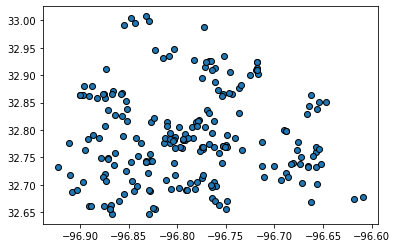

In [22]:
plt.scatter(data=incident,x='longitude', y='latitude',edgecolors='black')

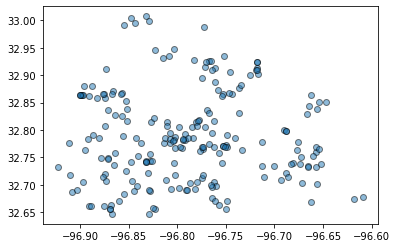

In [23]:
plt.scatter(data=incident,x='longitude', y='latitude',edgecolors='black',alpha=0.5)

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature selection
- Here we will continue with the features selected feel free to explore other features.
- Create a `dataset` with the features: `race`, `subject_statuses`, `latitude`, `longitude`
    - HINT: Select the features of the DataFrame `subject_incidents` by filtering with a list of the columns.
- To make further processing easier apply `dropna()` to remove missing data.

In [24]:
join_sub_inci.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [25]:
req_clean=join_sub_inci.copy()
req_clean.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,L,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,L,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,B,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,B,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


In [26]:
req_clean['race'].unique()

array(['L', 'B', 'W', 'A'], dtype=object)

In [27]:
req_clean['subject_statuses'].unique()

array(['Injured', 'Other', 'Shoot and Miss', 'Deceased',
       '1 Deceased 1 Injured', '2 Injured', 'Deceased Injured'],
      dtype=object)

### Step 3.b: How to visualize features
- We want to visualize the two features: `race` and `subject_statuses`
- A way to visualize data is by color and size.
- Idea:
    - Map the race features to colors
    - Map the subject_statuses to a size

### Step 3.b.1: Convert column
- The `race` column has the following categories: B, W, A, L
- We can map that to color values ([docs](https://matplotlib.org/stable/gallery/color/named_colors.html))
- A simple way to map columns is by using `apply` on a lambda-function.
    - Create a dict with the mapping:
    ```Python
mapping = {'B': 'blue', 'W': 'yellow', 'A': 'red', 'L': 'cyan'}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['race'] = dataset['race'].apply(lambda x: mapping[x])
```

In [28]:
mapping={'L':'yellow', 'B':'Blue', 'W':'red', 'A':'Cyan'}

In [29]:
req_clean['race']=req_clean['race'].apply(lambda x: mapping[x])
req_clean.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,yellow,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,Injured,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,yellow,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,Injured,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,yellow,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,Other,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,Blue,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,Blue,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


### Step 3.b.2: Convert column
- The `subject_statuses` has the following categories: `'1 Deceased 1 Injured', '2 Injured', 'Deceased', 'Deceased Injured', 'Injured', 'Other', 'Shoot and Miss'`
- The main categories are: `'Deceased', 'Injured', 'Shoot and Miss'`
- A simple way is quite similar to last step.
    - Create a mapping of the main categories:
    ```Python
mapping = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x: mapping.get(x, 100))
```

In [30]:
mapping={'Deceased':1000,'Injured':600,'Shoot and Miss':300}
req_clean['subject_statuses']=req_clean['subject_statuses'].apply(lambda x:mapping.get(x,100))
req_clean.head()

,case_number,race,gender,last_name,first_name,full_name,case_number,date,location,subject_statuses,...,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,yellow,M,Curry,James,"Curry, James",44523A,2013-02-23,3000 Chihuahua Street,600,...,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,yellow,M,Chavez,Gabriel,"Chavez, Gabriel",121982X,2010-05-03,1300 N. Munger Boulevard,600,...,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,yellow,M,Salinas,Nick,"Salinas, Nick",605484T,2007-08-12,200 S. Stemmons Freeway,100,...,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,Blue,M,Smith,James,"Smith, James",384832T,2007-05-26,7900 S. Loop 12,300,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,384832T,Blue,M,Dews,Antonio,"Dews, Antonio",384832T,2007-05-26,7900 S. Loop 12,300,...,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN


### Step 3.c: Visualize the data
- Now we can visualize the data
- This can be done with a scatter plot
```Python
dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5)
```
- Where `s=` is the size feature and `c=` is the color feature, `figsize=` sets the size of the figure, `alpha=` sets the transparency of the dots.

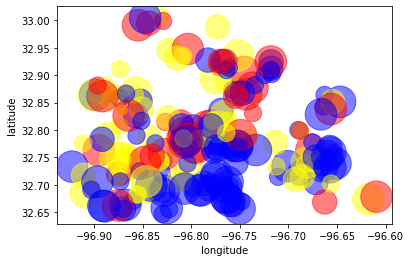

In [31]:
req_clean.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5)
plt.show()

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present a chart
- The goal here is to present your message
- Visualize one chart
- Add a headline (title) to give the audience a message

<AxesSubplot:ylabel='gender'>

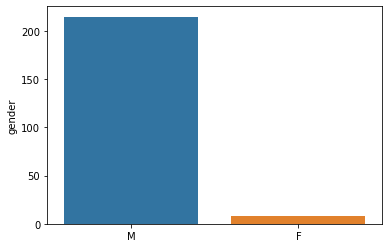

In [32]:

sns.barplot(data=join_sub_inci,x=join_sub_inci['gender'].value_counts().keys(),y=join_sub_inci['gender'].value_counts())

<AxesSubplot:ylabel='subject_statuses'>

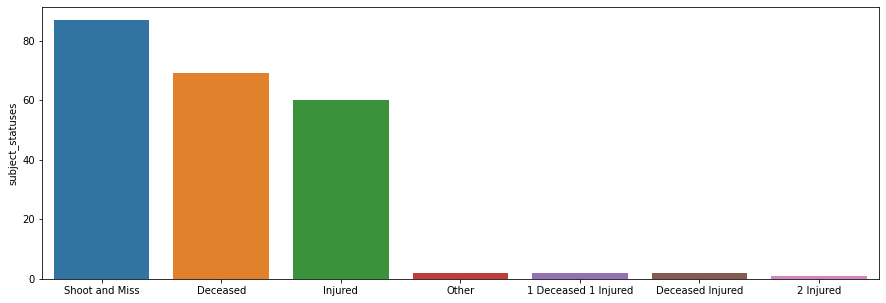

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=join_sub_inci,x=join_sub_inci['subject_statuses'].value_counts().keys(),y=join_sub_inci['subject_statuses'].value_counts())

### Step 4.b (Optional): Further improvements
- Ideas to improve the visualization
- Add description (legends) with color and size description.
- Visualize it on a map
    - You could use [folium](https://python-visualization.github.io/folium/)
    - Explore [quick guide](https://python-visualization.github.io/folium/quickstart.html)

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a (Optional): Are there any insights?
- Any insights you want to highlight?
- Any future measurements?